In [1]:
%matplotlib inline
import numpy
from astropy.io import fits
import h5py
from sys import  path
path.append("/home/hkli/work/mylib/")
import tool_box
from plot_tool import Image_Plot
import matplotlib.pyplot as plt
from numpy import fft
from scipy import signal

In [2]:
def gamma_to_kappa(g1, dx):
    sp = g1.shape
    nx, ny = dx*2+1, dx*2+1
    cenx, ceny = int(nx / 2), int(ny / 2)

    my, mx = numpy.mgrid[-ceny:ny - ceny, -cenx:nx - cenx]
#     print(nx, cenx, my.min(), my.max())

    R2 = my ** 2 + mx ** 2
    R2[ceny, cenx] = 1
    D1 = (my ** 2 - mx ** 2) / R2 ** 2
    D2 = -2 * my * mx / R2 ** 2

    kappa_1 = signal.convolve(g1, D1, mode="same")
    kappa_2 = signal.convolve(g1, D2, mode="same")
    return kappa_1, kappa_2

def gauss_kappa(ny, nx, ceny, cenx, sig, ampl=1):
    cy, cx = int(ny / 2), int(nx / 2)
    ky, kx = numpy.mgrid[-cy:cy, -cx:cx]
    return ampl/numpy.pi/2/sig**2*numpy.exp(-((ky-ceny)**2+(kx-cenx)**2)/2/sig**2)

(array([45]), array([50]))
2.5 0.239199185586 0.239199185586
8 0.238291222377 0.00379584574026


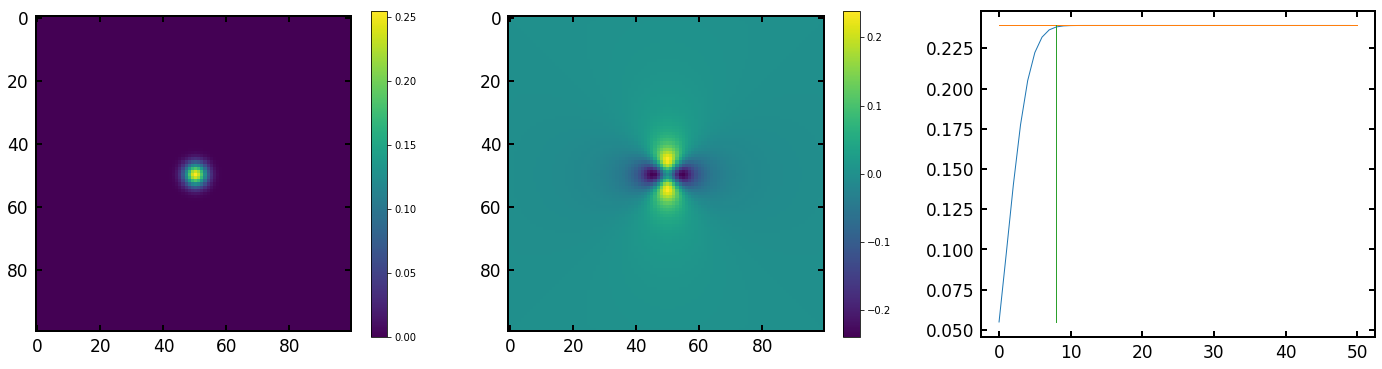

In [26]:
img = Image_Plot()
img.subplots(1,3)

size = 100
sig = size/40.
cen = int(size/2)
gauss = gauss_kappa(size,size,0,0,sig, 10)

gauss_new = gamma_to_kappa(gauss, size)[0]
npw = numpy.where(gauss_new == gauss_new.max())
print(npw)
y_m, x_m = npw[0][0], npw[1][0]
bench = gauss_new[y_m,x_m]
print(sig, bench, gauss_new.max())

num = cen
dv = []
tag = -1
for i in range(num):
    gauss_new = gamma_to_kappa(gauss, 2 + i)[0]
#     img = Image_Plot()
#     img.subplots(1,1)
#     fig = img.axs[0][0].imshow(gauss_new)
#     plt.colorbar(fig, ax=img.axs[0][0])
#     img.show_img()
    rebuild = gauss_new[y_m,x_m]
    dv.append(rebuild)
    diff = numpy.abs(rebuild - bench)/bench 
    if diff < 1.e-2 and tag <1:
        tag = i
        print(i, rebuild,diff)
#     print(i*2 +2, gauss_new[cen-20,cen])

fig = img.axs[0][0].imshow(gauss)
plt.colorbar(fig, ax=img.axs[0][0])
fig = img.axs[0][1].imshow(gauss_new)
plt.colorbar(fig, ax=img.axs[0][1])

img.axs[0][2].plot(range(num), dv, linewidth=1)
img.axs[0][2].plot([0, num],[bench, bench], linewidth=1)
img.axs[0][2].plot([tag, tag],[dv[0], bench], linewidth=1)
img.show_img()

(array([47]), array([75]))
15.0 0.00663092414201 0.00663092414201
(array([56]), array([75]))
10.0 0.0149280598938 0.0149280598938
(array([61]), array([75]))
7.5 0.0265407799246 0.0265407799246
(array([64]), array([75]))
6.0 0.0414364407054 0.0414364407054
(array([66]), array([75]))
5.0 0.0595657018887 0.0595657018887
(array([67]), array([75]))
4.285714285714286 0.0814234695476 0.0814234695476
(array([68]), array([75]))
3.75 0.106432565315 0.106432565315
(array([69]), array([75]))
3.3333333333333335 0.134354868826 0.134354868826
(array([69]), array([75]))
3.0 0.16577682721 0.16577682721
(array([70]), array([75]))
2.727272727272727 0.201579655141 0.201579655141
(array([70]), array([75]))
2.5 0.239199185586 0.239199185586
(array([71]), array([75]))
2.3076923076923075 0.279490835987 0.279490835987
(array([71]), array([75]))
2.142857142857143 0.328124839809 0.328124839809
(array([71]), array([75]))
2.0 0.37510153882 0.37510153882
(array([71]), array([75]))
1.875 0.419021790635 0.41902179063

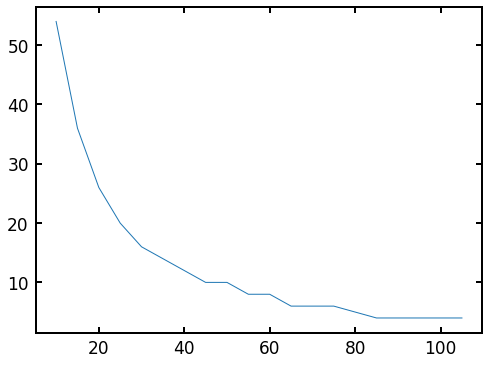

In [30]:


sig_level = []
tags = []
for isig in range(20):
    size = 150
    sig = size/(10 + isig*5)
    sig_level.append(10 + isig*5)
    cen = int(size/2)
    gauss = gauss_kappa(size,size,0,0,sig, 10)

    gauss_new = gamma_to_kappa(gauss, size)[0]
    npw = numpy.where(gauss_new == gauss_new.max())
    print(npw)
    y_m, x_m = npw[0][0], npw[1][0]
    bench = gauss_new[y_m,x_m]
    print(sig, bench, gauss_new.max())

    num = cen
    tag = -1
    for i in range(num):
        gauss_new = gamma_to_kappa(gauss, 2 + i)[0]
    #     img = Image_Plot()
    #     img.subplots(1,1)
    #     fig = img.axs[0][0].imshow(gauss_new)
    #     plt.colorbar(fig, ax=img.axs[0][0])
    #     img.show_img()
        rebuild = gauss_new[y_m,x_m]
#         dv.append(rebuild)
        diff = numpy.abs(rebuild - bench)/bench 
        if diff < 1.e-2 and tag <1:
            tag = i
#             print(i, rebuild,diff)
    tags.append(tag)
    #     print(i*2 +2, gauss_new[cen-20,cen])
img = Image_Plot()
img.subplots(1,1)
img.axs[0][0].plot(sig_level, tags, linewidth=1)

img.show_img()

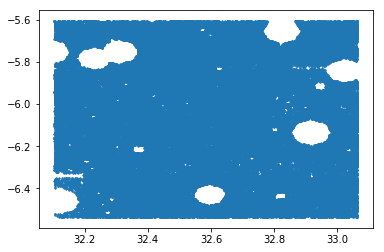

In [37]:
data = numpy.loadtxt("/mnt/ddnfs/data_users/hkli/CFHT/catalog/fourier_cata/w1m2p1/result_ext/w1m2p1_shear.dat")
plt.scatter(data[:,12], data[:,13],s=2)
plt.show()